# Air Line Passenger Satisfaction

# Importing Libraries

In [1]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

# Importing And Understanding The Data

In [2]:
# Load the Air Line data

alp_train = pd.read_csv(r"train.csv", header=0)
alp_test = pd.read_csv(r"test.csv", header=0)

# Copy to back-up file

alp_train_bk = alp_train.copy()
alp_test_bk = alp_test.copy()

In [3]:
# Display first 5 records

alp_train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
# Display first 5 records

alp_test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


In [5]:
# Display the dataset information

alp_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [6]:
# Display the dataset information

alp_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [7]:
# Check if there are duplicate rows in the dataset

alp_train.duplicated().any()

False

In [8]:
# Count the missing values by each variable, if available

alp_train.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [9]:
# Count the missing values by each variable, if available

alp_test.isnull().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [10]:
# Display the unique values by variable wise

for i in alp_train.columns:
    print(alp_train[i].value_counts())
    print('----------------------------------------------')

0         1
69266     1
69276     1
69275     1
69274     1
         ..
34631     1
34630     1
34629     1
34628     1
103903    1
Name: Unnamed: 0, Length: 103904, dtype: int64
----------------------------------------------
70172     1
116739    1
6259      1
17470     1
118574    1
         ..
107167    1
103283    1
112365    1
98359     1
62567     1
Name: id, Length: 103904, dtype: int64
----------------------------------------------
Female    52727
Male      51177
Name: Gender, dtype: int64
----------------------------------------------
Loyal Customer       84923
disloyal Customer    18981
Name: Customer Type, dtype: int64
----------------------------------------------
39    2969
25    2798
40    2574
44    2482
42    2457
      ... 
74      47
76      45
79      42
78      33
85      17
Name: Age, Length: 75, dtype: int64
----------------------------------------------
Business travel    71655
Personal Travel    32249
Name: Type of Travel, dtype: int64
--------------------------

# Data Cleaning

In [11]:
alp_train.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [12]:
# Droping column "Unnamed: 0" and "id" because it doesn't increment in my analysis

alp_train = alp_train.drop(['Unnamed: 0','id'], axis=1)

alp_test = alp_test.drop(['Unnamed: 0','id'], axis=1)

In [13]:
alp_train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [14]:
# Cleaning column "Satisfaction" to indicate only if customer was satisfied or not

alp_train.rename(columns={"satisfaction":"Dissatisfied"}, inplace=True)
alp_test.rename(columns={"satisfaction":"Dissatisfied"}, inplace=True)

alp_train["Dissatisfied"] = alp_train["Dissatisfied"].apply(lambda x: 1 if x=='neutral or dissatisfied' else 0)
alp_test["Dissatisfied"] = alp_test["Dissatisfied"].apply(lambda x: 1 if x=='neutral or dissatisfied' else 0)

In [15]:
alp_train["Dissatisfied"].value_counts()

1    58879
0    45025
Name: Dissatisfied, dtype: int64

In [16]:
# Count the target or dependent variable by '0' & '1' and their proportion 
# (>= 10 : 1, then the dataset is imbalance data)

Dissatisfied_count = alp_train.Dissatisfied.value_counts()

# print(Dissatisfied_count)

print('Class 0:', Dissatisfied_count[0])
print('Class 1:', Dissatisfied_count[1])
print('Proportion:', round(Dissatisfied_count[1] / Dissatisfied_count[0], 2), ': 1')
print('Total Number of Records:', len(alp_train))

Class 0: 45025
Class 1: 58879
Proportion: 1.31 : 1
Total Number of Records: 103904


In [17]:
# Use LabelBinarizer to handle categorical data

from sklearn.preprocessing import LabelBinarizer

LB = LabelBinarizer()

alp_train['Gender'] = LB.fit_transform(alp_train['Gender'])
alp_test['Gender'] = LB.fit_transform(alp_test['Gender'])

alp_train['Customer Type'] = LB.fit_transform(alp_train['Customer Type'])
alp_test['Customer Type'] = LB.fit_transform(alp_test['Customer Type'])

alp_train['Type of Travel'] = LB.fit_transform(alp_train['Type of Travel'])
alp_test['Type of Travel'] = LB.fit_transform(alp_test['Type of Travel'])

In [18]:
# Use LabelEncoder to handle 'Class' variable

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

alp_train['Class'] = le.fit_transform(alp_train['Class'])
alp_test['Class'] = le.fit_transform(alp_test['Class'])

In [19]:
alp_train['Class'].value_counts()

0    49665
1    46745
2     7494
Name: Class, dtype: int64

In [20]:
alp_train.head(10)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Dissatisfied
0,1,0,13,1,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,1
1,1,1,25,0,0,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,1
2,0,0,26,0,0,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,0
3,0,0,25,0,0,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,1
4,1,0,61,0,0,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,0
5,0,0,26,1,1,1180,3,4,2,1,1,2,1,1,3,4,4,4,4,1,0,0.0,1
6,1,0,47,1,1,1276,2,4,2,3,2,2,2,2,3,3,4,3,5,2,9,23.0,1
7,0,0,52,0,0,2035,4,3,4,4,5,5,5,5,5,5,5,4,5,4,4,0.0,0
8,0,0,41,0,0,853,1,2,2,2,4,3,3,1,1,2,1,4,1,2,0,0.0,1
9,1,1,20,0,1,1061,3,3,3,4,2,3,3,2,2,3,4,4,3,2,0,0.0,1


# Data Visualization

<AxesSubplot:>

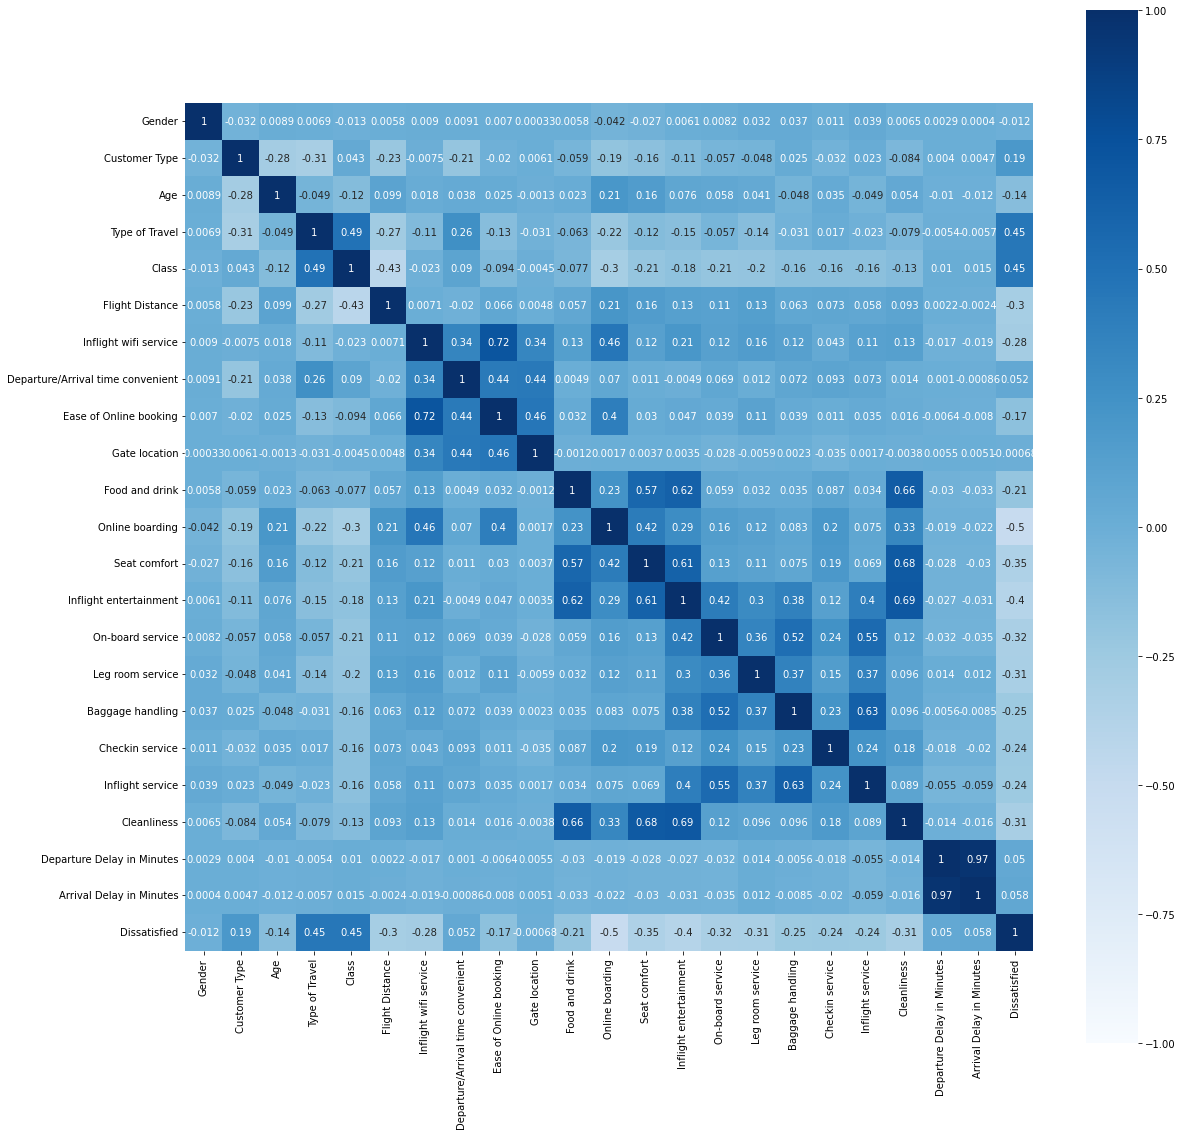

In [21]:
# Making a heatmap for the numeric data to understand how they correlate in pairs

plt.figure(figsize=(19,19))
sns.heatmap(alp_train.corr(), cbar=True, square=True, annot=True, cmap='Blues', vmin=-1)

As we can verify, there's only two columns that are very correlated with one another: Departure Delay in Minutes and Arrival Delay in Minutes, with more than 90% of correlation. This will probably lead to multicollinearity problems.

Therefore, it may be interesting to drop one of these columns in order to have the best prediction as possible.

I have choose to drop Arrival Delay in Minutes

In [22]:
# Droping column 'Arrival Delay in Minutes' because it is highly corelated with 'Departure Delay in Minutes'

alp_train = alp_train.drop(['Arrival Delay in Minutes'], axis=1)
alp_test = alp_test.drop(['Arrival Delay in Minutes'], axis=1)

In [23]:
# Splitting the data

x_train = alp_train.drop(['Dissatisfied'],axis=1)
y_train = alp_train['Dissatisfied']

x_test = alp_test.drop(['Dissatisfied'],axis=1)
y_test = alp_test['Dissatisfied']

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((103904, 21), (25976, 21), (103904,), (25976,))

In [24]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train = mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test = mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

# Classification Models

In [25]:
# Build the Calssification models and compare the results

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC

# Create objects of classification algorithm with default hyper-parameters

ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelSVM = SVC(probability=True)

MM = [ModelRF, ModelET, ModelSVM]
for models in MM:
    models.fit(x_train, y_train)           # Fit the model
    
    y_pred = models.predict(x_test)        # Prediction
    y_pred_prob = models.predict_proba(x_test)
    
    from sklearn.metrics import confusion_matrix
    actual = y_test          # actual values
    predicted = y_pred       # predicted values
    # confusion matrix
    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    
    # outcome values order in sklearn
    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    
    # calculating the metrics
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    recall = round(tp/(tp+fn),3);
    specificity = round(tn/(tn+fp),3);

    # Print the model name and its outcome values, metrics
    print('Model Name: ', models)
    print()
    print('Confusion matrix : \n', matrix)
    print()
    print('Outcome values : \n', tp, fn, fp, tn)
    print()
    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(recall*100,2),'%')
    print('Specificity :', round(specificity*100,2),'%')
    print('F1 Score :', f1Score)
    
    print('-----------------------------------------------------------------------------------------------------')   

Model Name:  RandomForestClassifier()

Confusion matrix : 
 [[14260   313]
 [  719 10684]]

Outcome values : 
 14260 313 719 10684

Accuracy : 96.0 %
Precision : 95.2 %
Recall : 97.9 %
Specificity : 93.7 %
F1 Score : 0.965
-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()

Confusion matrix : 
 [[14263   310]
 [  674 10729]]

Outcome values : 
 14263 310 674 10729

Accuracy : 96.2 %
Precision : 95.5 %
Recall : 97.9 %
Specificity : 94.1 %
F1 Score : 0.967
-----------------------------------------------------------------------------------------------------
Model Name:  SVC(probability=True)

Confusion matrix : 
 [[14077   496]
 [  758 10645]]

Outcome values : 
 14077 496 758 10645

Accuracy : 95.2 %
Precision : 94.9 %
Recall : 96.6 %
Specificity : 93.4 %
F1 Score : 0.957
-----------------------------------------------------------------------------------------------------
